In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nifty_50=pd.read_csv("National_Stock_Exchange_of_India_Ltd.csv")

In [3]:
nifty_50.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [4]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


In [13]:
nifty_50.rename(columns={"% Chng":"Percent_Change","Volume (lacs)":"Volume_In_Lacs","Turnover (crs.)":"Turnover_In_Crores","52w H":"52_Week_High","52w L":"52_Week_Low",
                      "365 d % chng":"365_Day_Percent_Change","30 d % chng":"30_Day_Percent_Change"},inplace=True)
cols = nifty_50.select_dtypes(exclude=['float']).columns
for col in cols:
    print(col)
    nifty_50[col]=nifty_50[col].str.replace(",","")

nifty_50[cols] = nifty_50[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

nifty_50.info()

Symbol
Open
High
Low
LTP
Turnover_In_Crores
52_Week_High
52_Week_Low
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  0 non-null      float32
 1   Open                    50 non-null     float32
 2   High                    50 non-null     float32
 3   Low                     50 non-null     float32
 4   LTP                     50 non-null     float32
 5   Chng                    50 non-null     float64
 6   Percent_Change          50 non-null     float64
 7   Volume_In_Lacs          50 non-null     float64
 8   Turnover_In_Crores      50 non-null     float32
 9   52_Week_High            50 non-null     float32
 10  52_Week_Low             50 non-null     float32
 11  365_Day_Percent_Change  50 non-null     float64
 12  30_Day_Percent_Change   50 non-null     float64
dtypes: float32(8), float64(5)
me

In [14]:
nifty_50.describe()

,Symbol,Open,High,Low,LTP,Chng,Percent_Change,Volume_In_Lacs,Turnover_In_Crores,52_Week_High,52_Week_Low,365_Day_Percent_Change,30_Day_Percent_Change
count,0.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,NaN,2985.739014,3017.261230,2914.208008,2939.568848,-70.133000,-2.930200,71.266600,569.706787,3440.588135,2208.556885,41.203000,-5.996800
std,NaN,5024.412598,5057.739258,4911.416992,4943.921387,163.203678,2.677007,93.462062,492.383118,5813.044922,3962.990967,37.358646,6.322546
min,NaN,125.599998,125.599998,120.500000,121.150002,-770.500000,-7.480000,0.300000,76.940002,141.500000,77.050003,-16.020000,-22.080000
25%,NaN,673.000000,678.425018,662.112503,663.187500,-66.775000,-4.527500,13.472500,195.897499,777.824997,391.837494,9.375000,-9.665000
50%,NaN,1155.950012,1156.750000,1105.750000,1121.250000,-29.975000,-3.300000,30.750000,463.429993,1456.125000,819.774994,35.860000,-5.705000
75%,NaN,2760.262573,2789.424988,2668.537476,2690.450012,-7.812500,-1.932500,99.200000,744.502487,3388.000000,2272.599976,65.942500,-2.222500
max,NaN,26450.000000,26539.900391,25812.000000,25900.000000,158.400000,7.230000,517.880000,2430.360107,32048.000000,22531.000000,167.950000,6.360000


Text(0, 0.5, 'Turnover(crores)')

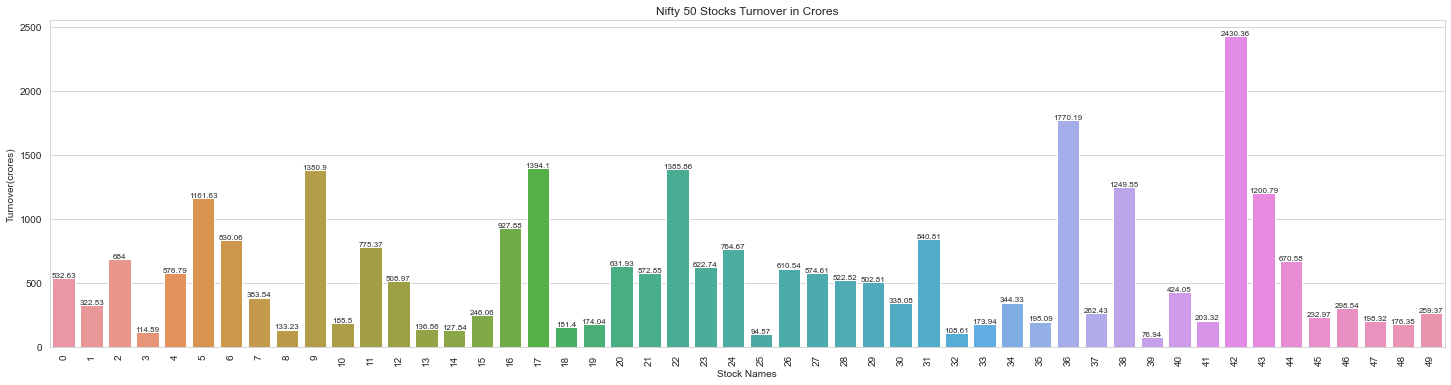

In [18]:
plt.figure(figsize=(25,6))
plt.xticks(rotation=90)

sns.set_style("whitegrid")

ax = sns.barplot(x=nifty_50.index,y=nifty_50["Turnover_In_Crores"])
#sns.barplot(x=nifty_50.index,y=nifty_50["Turnover_In_Crores"])
ax.bar_label(ax.containers[0], fontsize = 8)
plt.title("Nifty 50 Stocks Turnover in Crores")
plt.xlabel("Stock Names")
plt.ylabel("Turnover(crores)")

Text(0, 0.5, 'Volume(Lacs)')

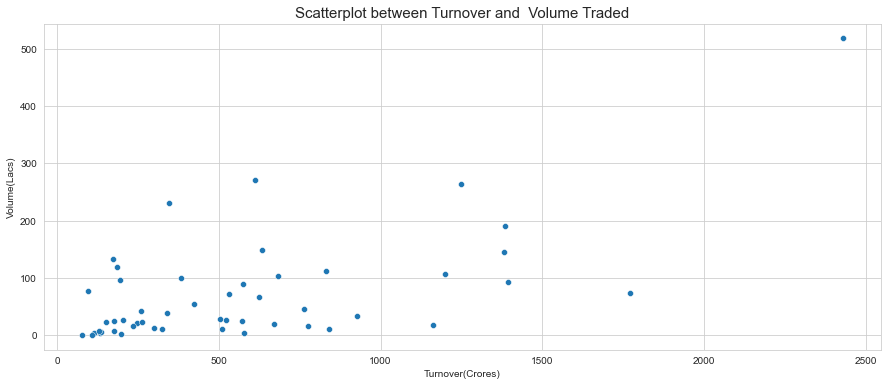

In [19]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=nifty_50.Turnover_In_Crores,y=nifty_50.Volume_In_Lacs)
plt.title("Scatterplot between Turnover and  Volume Traded",fontsize=15)
plt.xlabel("Turnover(Crores)",fontsize=10)
plt.ylabel("Volume(Lacs)",fontsize=10)

Text(0, 0.5, 'Volume(Lacs)')

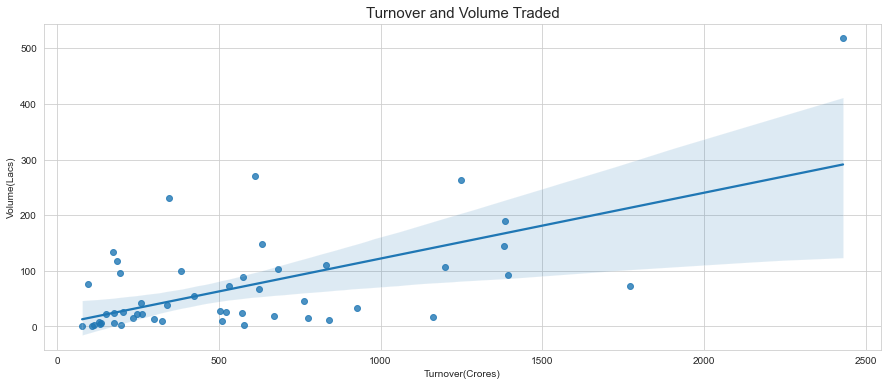

In [20]:
plt.figure(figsize=(15,6))
sns.regplot(x="Turnover_In_Crores",y="Volume_In_Lacs",data=nifty_50)
plt.title("Turnover and Volume Traded",fontsize=15)
plt.xlabel("Turnover(Crores)",fontsize=10)
plt.ylabel("Volume(Lacs)",fontsize=10)

Text(0, 0.5, '365 Days percent change')

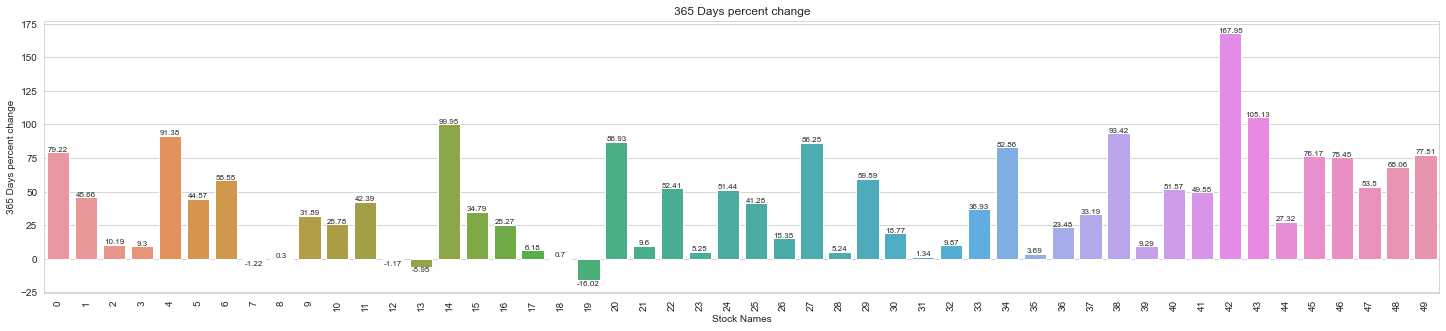

In [21]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=nifty_50.index,y=nifty_50["365_Day_Percent_Change"])
ax.bar_label(ax.containers[0], fontsize = 8)
plt.title("365 Days percent change")
plt.xlabel("Stock Names")
plt.ylabel("365 Days percent change")

Text(0, 0.5, '365 Days percent change')

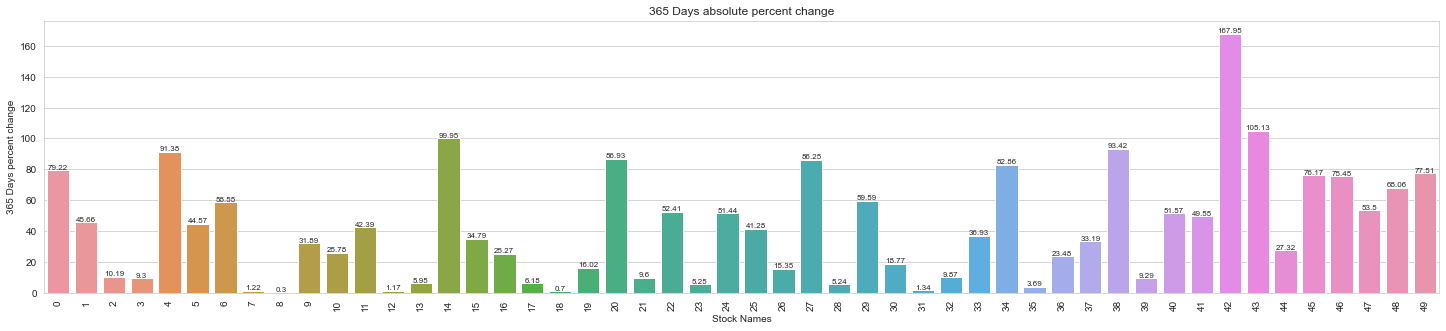

In [22]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=nifty_50.index,y=nifty_50["365_Day_Percent_Change"].abs())
ax.bar_label(ax.containers[0],fontsize=8)
plt.title("365 Days absolute percent change")
plt.xlabel("Stock Names")
plt.ylabel("365 Days percent change")

In [23]:
nifty_50["Avg_Price_52_Week"]= (nifty_50["52_Week_High"]+nifty_50["52_Week_Low"])/2
nifty_50["Standard_Deviation"] = np.sqrt(((nifty_50["52_Week_High"]-nifty_50["Avg_Price_52_Week"])**2 + (nifty_50["52_Week_Low"]-nifty_50["Avg_Price_52_Week"])**2)/2)

Text(0, 0.5, 'Standard Deviation')

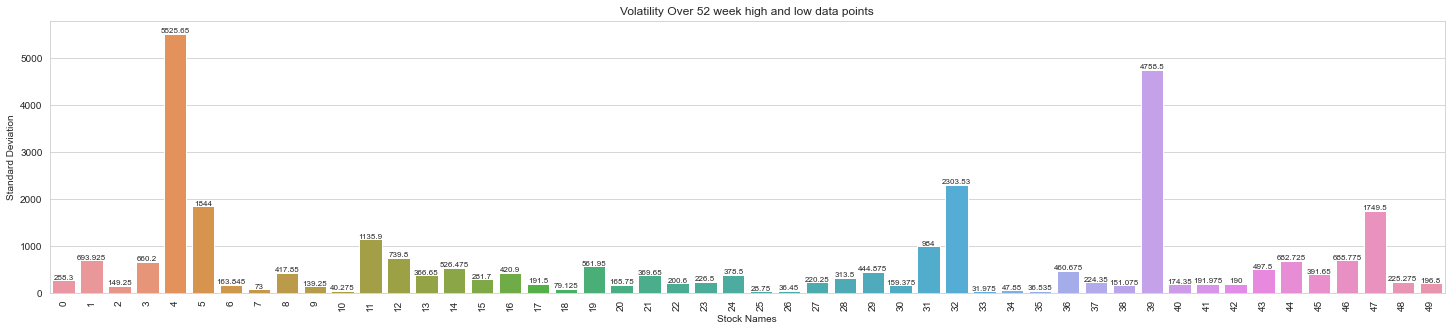

In [24]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=nifty_50.index,y=nifty_50["Standard_Deviation"])
ax.bar_label(ax.containers[0], fontsize = 8)
plt.title("Volatility Over 52 week high and low data points")
plt.xlabel("Stock Names")
plt.ylabel("Standard Deviation")

Text(0, 0.5, 'Standard Deviation of Nifty 50 stocks')

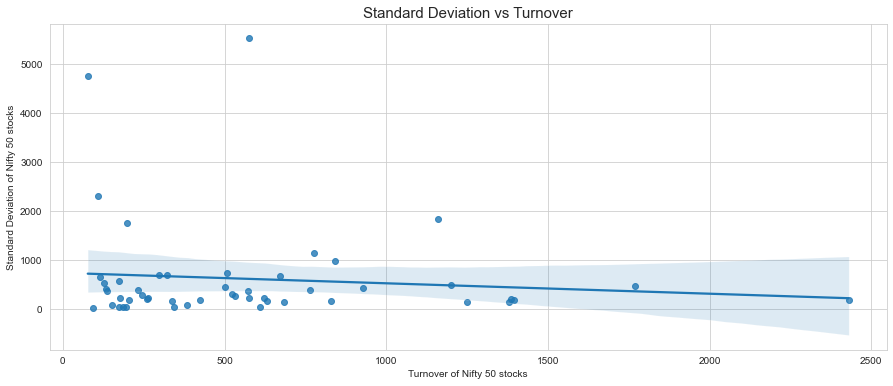

In [26]:
plt.figure(figsize=(15,6))
sns.regplot(x=nifty_50["Turnover_In_Crores"],y=nifty_50["Standard_Deviation"])
plt.title("Standard Deviation vs Turnover",fontsize=15)
plt.xlabel("Turnover of Nifty 50 stocks")
plt.ylabel("Standard Deviation of Nifty 50 stocks")

Text(0.5, 1.0, 'Heatmap of Attributes to check the correlation')

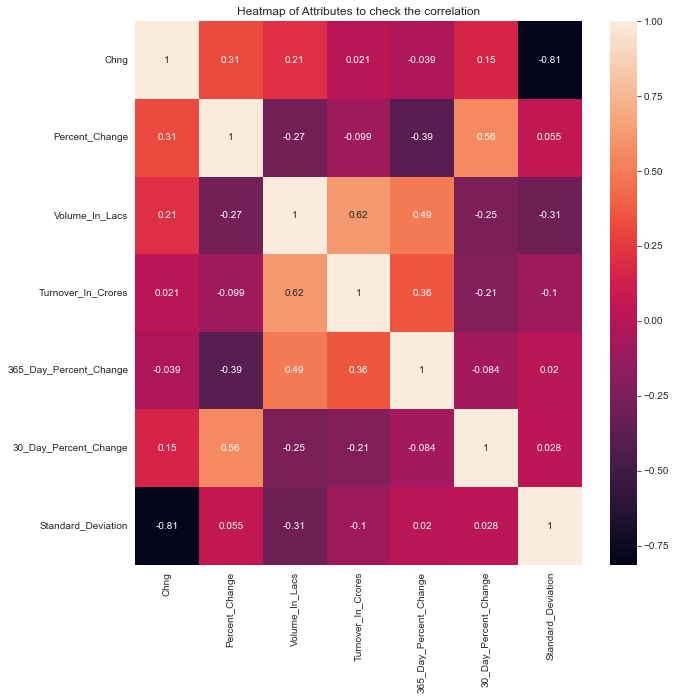

In [27]:
nifty_50_related=nifty_50.iloc[:,5:]
nifty_50_related=nifty_50_related.drop(["52_Week_High","52_Week_Low","Avg_Price_52_Week"],axis=1)
nifty_50_corr=nifty_50_related.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(nifty_50_corr,annot=True)
plt.title("Heatmap of Attributes to check the correlation")